# Lightweight-Predictions
## Derived from generate clusters

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2


## Part 1: Hitters

In [2]:
import hittingpredictor as hp

In [48]:

# which years are we interested in querying?
years = range(2019-10, 2019+1)


year_dfs = []

for year in years:
    print(year)

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    



In [61]:
nclusters = 12

years = [2016,2017,2018,2019]
years = [2016,2017,2018,2019]

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)


In [62]:
hitter_cluster_centroid_df

,HR.Centroid,H.Centroid,AB.Centroid,SB.Centroid,RBI.Centroid,R.Centroid,Tot.Rank,HR.Rank,H.Rank,SB.Rank,RBI.Rank,R.Rank,Value Cluster,Clusters
9,5.080824,18.289568,83.140020,1.641895,14.443470,16.066475,3.421918,1.099584,-0.351183,0.197449,0.875966,1.600101,12.0,9
0,6.114098,17.515228,88.332384,0.635641,17.220872,14.329012,3.349555,1.720025,-0.577372,-0.417531,1.721123,0.903310,11.0,0
11,3.515636,23.587538,90.333048,1.856124,12.923578,15.074146,3.300113,0.159750,1.196381,0.328376,0.413467,1.202138,10.0,11
8,1.571123,21.547730,90.146054,5.977443,7.155359,13.603392,1.710362,-1.007853,0.600543,2.847150,-1.341787,0.612308,9.0,8
5,4.016852,21.116932,91.732992,0.757247,14.649519,12.214910,1.586344,0.460711,0.474705,-0.343211,0.938666,0.055473,8.0,5
3,3.462444,19.085485,88.691445,1.440298,11.744829,12.847501,0.447304,0.127811,-0.118692,0.074241,0.054777,0.309167,7.0,3
1,1.954476,24.343765,93.072869,1.909691,10.019149,11.678369,0.370684,-0.777665,1.417279,0.361114,-0.470343,-0.159701,6.0,1
6,4.453596,14.599294,85.643017,0.621487,12.690078,12.541680,-0.603420,0.722959,-1.429131,-0.426181,0.342414,0.186520,5.0,6
7,4.149936,17.072399,91.625102,0.501135,13.188929,10.413929,-0.838415,0.540623,-0.706724,-0.499736,0.494213,-0.666791,4.0,7
10,1.580768,21.617126,86.664278,1.023512,9.118352,11.605191,-1.495230,-1.002061,0.620814,-0.180481,-0.744453,-0.189049,3.0,10


In [68]:
nclusters=4
year_df,df,stereotype_df,hitter_cluster_centroid_df4,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)
arr4 = np.array(hitter_cluster_centroid_df4)[:,0:6]


In [69]:
nclusters=5
year_df,df,stereotype_df,hitter_cluster_centroid_df5,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)
arr5 = np.array(hitter_cluster_centroid_df5)[:,0:6]



Text(0, 0.5, 'k Level')

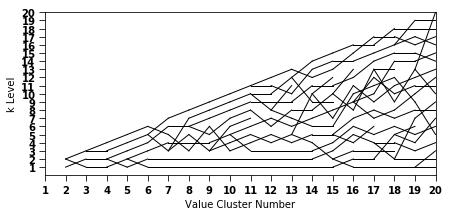

In [95]:

plt.figure(figsize=(7,3))

for n in range(2,20):
    nclusters1=n
    nclusters2=n+1
    #
    year_df,df,stereotype_df,hitter_cluster_centroid_df1,transform = hp.compute_cluster(all_year_data,years,nclusters1,min_pas=150,verbose=0)
    arr1 = np.array(hitter_cluster_centroid_df1)[:,0:6]
    #
    year_df,df,stereotype_df,hitter_cluster_centroid_df2,transform = hp.compute_cluster(all_year_data,years,nclusters2,min_pas=150,verbose=0)
    arr2 = np.array(hitter_cluster_centroid_df2)[:,0:6]
    for i in range(0,nclusters2):
        minvals = np.argmin(np.sum(np.abs(arr2[i]-arr1),axis=1))
        plt.plot([nclusters1,nclusters2],[nclusters1-minvals,nclusters2-i],color='black',lw=1.)
        

        
plt.axis([1,20,0,20])

plt.xticks(np.arange(1,21,1))
plt.yticks(np.arange(1,21,1))
plt.xlabel('Value Cluster Number')
plt.ylabel('k Level')



In [88]:
np.sum(np.abs(arr5[4]-arr4),axis=1)
#np.abs(arr4[0] - arr5)

array([22.06563551, 11.9014762 ,  7.17506286,  7.46050711])

In [60]:
stats = ['HR', 'H', 'AB', 'SB', 'RBI','R']
denom = 'PA'

# put a player in a particular 

plr = 'Mike Trout'
lght_df = df.loc[df['Name'] == plr]

uni_years = np.unique(lght_df['Year'])
clustervals = np.zeros([uni_years.size,12])

for stat in stats:
    for iyear,year in enumerate(uni_years):
        for val in lght_df.loc[lght_df['Year']==year][stat+'.Normalize']:
            clustervals[iyear] += (np.abs(val-hitter_cluster_centroid_df[stat+'.Centroid']))
        
#print(clustervals)



for stat in stats:
    for iyear,year in enumerate(uni_years):
        bestcluster = np.argmin(clustervals[iyear])
        for val in lght_df.loc[lght_df['Year']==year][stat+'.Normalize']:
            print(stat,val-np.array(hitter_cluster_centroid_df[stat+'.Centroid'])[bestcluster])
            
    

HR -0.28711506226841044
HR -0.7516787450872346
HR 0.1536684814679532
HR -1.5996182583187153
HR 0.6508140158343316
HR 0.5564119603998874
HR 1.6419382761893608
H 0.11151332062163632
H 2.007910062535622
H 1.7834970927554572
H 3.7206603983996516
H 0.3267652390012721
H 0.3384438437972861
H -2.0913807176062225
AB -8.31746777439956
AB -0.10547193978658242
AB -1.184692421889693
AB -4.8788027736666635
AB -6.2056020333700275
AB -8.028437598614502
AB -7.162209528439064
SB 3.384935579697851
SB 1.2395943274467178
SB 0.5829940071538784
SB 3.375377124959761
SB 3.3093412744440736
SB 2.9174592024000585
SB 0.8034241146807601
RBI -1.0972446320706801
RBI -0.6320230163952445
RBI -3.1802229290426514
RBI -1.692416055417958
RBI -2.175520435506412
RBI -3.3832828148274956
RBI 0.9566294658742578
R 1.0256391550544155
R 1.03398222700298
R -0.02880764841558303
R 2.783599498224902
R 2.8678820969093977
R 1.3337675946774858
R 3.0552588227476605


In [30]:
hitter_cluster_centroid_df

,HR.Centroid,H.Centroid,AB.Centroid,SB.Centroid,RBI.Centroid,R.Centroid,Tot.Rank,HR.Rank,H.Rank,SB.Rank,RBI.Rank,R.Rank,Value Cluster,Clusters
0,6.114098,17.515228,88.332384,0.635641,17.220872,14.329012,3.349555,1.720025,-0.577372,-0.417531,1.721123,0.903310,11.0,0
1,1.954476,24.343765,93.072869,1.909691,10.019149,11.678369,0.370684,-0.777665,1.417279,0.361114,-0.470343,-0.159701,6.0,1
2,2.288080,15.513994,87.439855,0.823471,8.527760,9.616339,-3.952853,-0.577348,-1.161942,-0.302737,-0.924169,-0.986656,1.0,2
3,3.462444,19.085485,88.691445,1.440298,11.744829,12.847501,0.447304,0.127811,-0.118692,0.074241,0.054777,0.309167,7.0,3
4,1.855655,19.981365,92.023464,1.033666,8.441882,9.640290,-2.795630,-0.837003,0.143000,-0.174275,-0.950301,-0.977051,2.0,4
5,4.016852,21.116932,91.732992,0.757247,14.649519,12.214910,1.586344,0.460711,0.474705,-0.343211,0.938666,0.055473,8.0,5
6,4.453596,14.599294,85.643017,0.621487,12.690078,12.541680,-0.603420,0.722959,-1.429131,-0.426181,0.342414,0.186520,5.0,6
7,4.149936,17.072399,91.625102,0.501135,13.188929,10.413929,-0.838415,0.540623,-0.706724,-0.499736,0.494213,-0.666791,4.0,7
8,1.571123,21.547730,90.146054,5.977443,7.155359,13.603392,1.710362,-1.007853,0.600543,2.847150,-1.341787,0.612308,9.0,8
9,5.080824,18.289568,83.140020,1.641895,14.443470,16.066475,3.421918,1.099584,-0.351183,0.197449,0.875966,1.600101,12.0,9


In [24]:
lght_df

,#,Name,Team,G,AB,PA,H,1B,2B,3B,...,AVG,Year,HR.Normalize,H.Normalize,AB.Normalize,SB.Normalize,RBI.Normalize,R.Normalize,Clusters,Value Cluster
13,52,Mike Trout,Angels,159.0,549.0,681.0,173.0,107.0,32.0,5.0,...,0.315,2016.0,4.258443,21.145374,80.616740,4.405286,14.684288,18.061674,9,7.0
418,76,Mike Trout,Angels,114.0,402.0,507.0,123.0,62.0,25.0,3.0,...,0.306,2017.0,6.508876,17.751479,79.289941,4.339250,14.201183,18.145957,9,7.0
791,50,Mike Trout,Angels,140.0,471.0,608.0,147.0,80.0,24.0,4.0,...,0.312,2018.0,6.414474,17.763158,77.467105,3.947368,12.993421,16.611842,9,7.0
1227,97,Mike Trout,Angels,134.0,470.0,600.0,137.0,63.0,27.0,2.0,...,0.291,2019.0,7.500000,15.333333,78.333333,1.833333,17.333333,18.333333,9,7.0


[2016. 2017. 2018. 2019.]


       #        Name    Team      G     AB     PA      H     1B    2B   3B  \
13    52  Mike Trout  Angels  159.0  549.0  681.0  173.0  107.0  32.0  5.0   
418   76  Mike Trout  Angels  114.0  402.0  507.0  123.0   62.0  25.0  3.0   
791   50  Mike Trout  Angels  140.0  471.0  608.0  147.0   80.0  24.0  4.0   
1227  97  Mike Trout  Angels  134.0  470.0  600.0  137.0   63.0  27.0  2.0   

      ...    AVG    Year  HR.Normalize  H.Normalize  AB.Normalize  \
13    ...  0.315  2016.0      4.258443    21.145374     80.616740   
418   ...  0.306  2017.0      6.508876    17.751479     79.289941   
791   ...  0.312  2018.0      6.414474    17.763158     77.467105   
1227  ...  0.291  2019.0      7.500000    15.333333     78.333333   

      SB.Normalize  RBI.Normalize  R.Normalize  Clusters  Value Cluster  
13        4.405286      14.684288    18.061674         9            7.0  
418       4.339250      14.201183    18.145957         9            7.0  
791       3.947368      12.993421    16.6

In [5]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor = 0.65
err_regression_factor = 1.2



In [15]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Shin-Soo Choo']

print('Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj')

for pl in pls:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=0,return_stats=True)

    

Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj
Shin-Soo Choo, 19.35, 6.04, 114.79, 8.07, 514.79, 21.12, 9.7, 4.53, 59.36, 10.94, 78.75, 8.96, 600, 1.0, 


In [31]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor = 0.65
err_regression_factor = 1.2




In [36]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Mike Trout']

print('Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj')

for pl in pls:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=1,return_stats=True)

    

Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj
Mike Trout, 36.58, 12.43, 105.21, 12.47, 480.01, 34.77, 15.88, 11.12, 88.91, 12.85, 102.38, 11.03, 600, 1.0, 


## Part 2: Pitchers

In [7]:
import pitchingpredictor as pp

In [8]:

# which years are we interested in querying?
years = range(2019-2, 2019+1)


year_dfs = []

for year in years:

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




In [9]:
nclusters = 12

year_df,df,stereotype_df,cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




In [10]:
# new tunings for pitchers...
year_weights = {}
year_weights[2017.0] = 0.12
year_weights[2018.0] = 0.33
year_weights[2019.0] = 0.55
print(year_weights)

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = -0.05


regression_factor = 0.8
err_regression_factor = 1.5




{2017.0: 0.12, 2018.0: 0.33, 2019.0: 0.55}


In [10]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Max Scherzer']

print('Player, HR, eHR, ER, eER, BB, eBB, H, eH, SO, eSO, IP, Adj')

for pl in pls:
    pp.generate_player_prediction(pl,df,cluster_centroid_df,\
                               estimated_ips=200,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=0)

    

Player, HR, eHR, ER, eER, BB, eBB, H, eH, SO, eSO, IP, Adj


NameError: name 'pp' is not defined

In [12]:
import pandas as pd

link='https://baseballsavant.mlb.com/statcast_search/csv?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2019%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results'
df_all = pd.read_csv(link, low_memory=False)

In [13]:
df_all

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,3223,656555,Rhys Hoskins,3223,100.0,0.226,0.228,0.267,0.454,0.351,...,1948,-0.3,6.04,108.0,152.0,118.0,145.0,302.0,328.0,300.0
1,3048,660670,Ronald Acuna Jr.,3048,100.0,0.280,0.238,0.337,0.518,0.373,...,1652,-0.2,6.01,109.0,153.0,116.0,146.0,313.0,328.0,296.0
2,2965,543760,Marcus Semien,2965,100.0,0.285,0.237,0.294,0.522,0.377,...,1713,-0.4,5.95,108.0,152.0,115.0,145.0,301.0,321.0,291.0
3,2915,608324,Alex Bregman,2915,100.0,0.296,0.296,0.281,0.592,0.423,...,1883,-0.5,5.98,106.0,151.0,119.0,145.0,296.0,326.0,292.0
4,2909,605141,Mookie Betts,2909,100.0,0.295,0.229,0.309,0.524,0.384,...,1790,-0.4,6.00,107.0,152.0,119.0,145.0,293.0,327.0,300.0
5,2888,502671,Paul Goldschmidt,2888,100.0,0.260,0.216,0.303,0.476,0.350,...,1544,-0.3,6.02,108.0,151.0,120.0,146.0,311.0,328.0,301.0
6,2862,593428,Xander Bogaerts,2862,100.0,0.309,0.246,0.338,0.555,0.394,...,1684,-0.4,6.01,107.0,152.0,119.0,146.0,293.0,326.0,298.0
7,2843,542340,Jonathan Villar,2843,100.0,0.274,0.179,0.341,0.453,0.339,...,1423,-0.3,6.02,108.0,148.0,104.0,148.0,292.0,320.0,297.0
8,2805,656305,Matt Chapman,2805,100.0,0.249,0.257,0.270,0.506,0.359,...,1617,-0.4,5.95,106.0,151.0,119.0,145.0,304.0,325.0,297.0
9,2793,467793,Carlos Santana,2793,100.0,0.281,0.234,0.293,0.515,0.384,...,1688,-0.4,5.98,113.0,159.0,124.0,148.0,295.0,324.0,300.0


# Part 3: Hitting Analysis

In [6]:
reviews = ['Ronald Acuna Jr.',\
          'Justin Upton',\
          'George Springer',\
          'Lorenzo Cain',\
          'Adam Jones',\
          'Tommy Pham',\
          'Dee Gordon',\
          'Eddie Rosario',\
          'Cody Bellinger',\
          'Jackie Bradley Jr.',\
          'Chad Pinder',\
          'Juan Soto',\
          'Max Kepler',\
          'Jeff McNeil',\
          'Willie Calhoun',\
          'Nomar Mazara',\
          'Michael Brantley',\
          'Alex Verdugo',\
          'Marcell Ozuna',\
          'David Dahl',\
          'Bryan Reynolds',\
          'Victor Robles',\
          'Christian Yelich',\
          'Jesse Winker',\
          'Ramon Laureano',\
          'Leury Garcia',\
          'Hunter Renfroe',\
          'Aaron Judge',\
          'Kevin Pillar',\
          'Ketel Marte',\
          'Starling Marte',\
          'Jorge Soler',\
          'Austin Meadows',\
          'Cameron Maybin',\
          'Tommy Edman',\
          'Adam Eaton',\
          'Josh Reddick',\
          'J.D. Martinez',\
          'Shin-Soo Choo']

Ronald Acuna Jr., 26.39, 6.95, 101.4, 8.8, 445.78, 19.47, 17.66, 16.32, 70.15, 1.69, 84.45, 8.48, 600, 1.0, 
Justin Upton, 28.45, 2.71, 92.48, 11.21, 519.01, 4.28, 4.9, 3.91, 85.92, 13.94, 78.39, 6.07, 600, 1.0, 
George Springer, 31.55, 3.87, 111.68, 4.56, 523.56, 13.55, 6.22, 3.37, 87.32, 1.79, 94.94, 22.08, 600, 1.0, 
Lorenzo Cain, 10.54, 1.99, 136.5, 11.63, 537.15, 9.15, 26.27, 15.78, 45.32, 4.81, 79.76, 9.25, 600, 1.0, 
Adam Jones, 18.3, 6.11, 133.32, 2.98, 556.55, 5.05, 5.1, 4.41, 72.38, 9.75, 69.09, 9.24, 600, 1.0, 
Tommy Pham, 19.7, 7.08, 119.95, 8.53, 520.05, 6.23, 15.24, 14.99, 64.59, 8.55, 82.92, 15.23, 600, 1.0, 
Dee Gordon, 6.47, 9.07, 148.2, 8.6, 560.67, 8.99, 27.51, 22.88, 46.82, 19.79, 64.98, 15.64, 600, 1.0, 
Eddie Rosario, 26.02, 7.2, 131.98, 3.55, 561.05, 23.99, 6.28, 2.85, 89.06, 15.27, 86.02, 14.78, 600, 1.0, 
Cody Bellinger, 30.21, 9.13, 103.0, 2.18, 477.18, 6.87, 10.87, 4.87, 82.08, 11.7, 87.11, 10.11, 600, 1.0, 
Jackie Bradley Jr., 20.97, 5.81, 102.44, 6.88, 525.

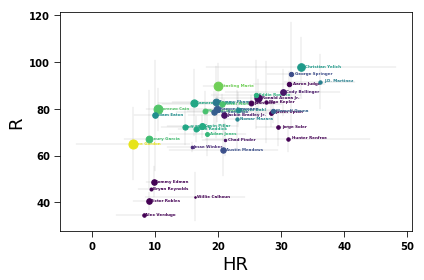

In [7]:

for pl in reviews:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=0,return_stats=True)
    plt.plot([S['HR'],S['HR']],[S['R']-S['eR'],S['R']+S['eR']],color='gray',lw=0.2)
    plt.plot([S['HR']-S['eHR'],S['HR']+S['eHR']],[S['R'],S['R']],color='gray',lw=0.2)
    plt.scatter(S['HR'],S['R'],color=cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S['HR'],S['R'],pl,size=4,color=cm.viridis((S['H']-100.)/50.,1.))

    
plt.xlabel('HR',size=18)
plt.ylabel('R',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

In [18]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor1 = 0.65
err_regression_factor1 = 1.2

# how aggresively to bring players back to the cluster center
regression_factor2 = 0.15
err_regression_factor2 = 1.2





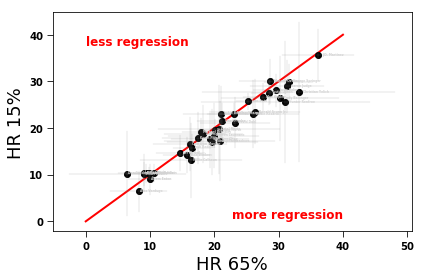

In [24]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor2,err_regression_factor=err_regression_factor2,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['HR'],S1['HR']],[S2['HR']-S2['eHR'],S2['HR']+S2['eHR']],color='gray',lw=0.2)
    plt.plot([S1['HR']-S1['eHR'],S1['HR']+S1['eHR']],[S2['HR'],S2['HR']],color='gray',lw=0.2)
    plt.scatter(S1['HR'],S2['HR'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['HR'],S2['HR'],pl,size=3,color='lightgray')

    
nmax = 40.


plt.text(0.,nmax,'less regression',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'more regression',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)
plt.xlabel('HR 65%',size=18)
plt.ylabel('HR 15%',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

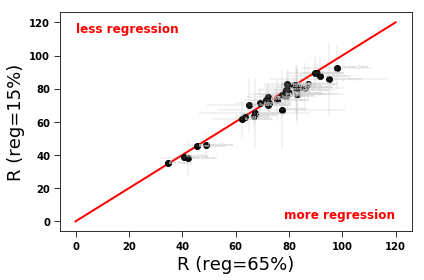

In [25]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor2,err_regression_factor=err_regression_factor2,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['R'],S1['R']],[S2['R']-S2['eR'],S2['R']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['R']-S1['eR'],S1['R']+S1['eR']],[S2['R'],S2['R']],color='gray',lw=0.2)
    plt.scatter(S1['R'],S2['R'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['R'],S2['R'],pl,size=3,color='lightgray')

    
nmax = 120.


plt.text(0.,nmax,'less regression',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'more regression',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.xlabel('R (reg=65%)',size=18)
plt.ylabel('R (reg=15%)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

In [27]:
# weights to consider for each year
year_weights1 = {}
year_weights1[2016.0] = 0.1
year_weights1[2017.0] = 0.1
year_weights1[2018.0] = 0.4
year_weights1[2019.0] = 0.4

year_weights2 = {}
year_weights2[2016.0] = 0.075
year_weights2[2017.0] = 0.075
year_weights2[2018.0] = 0.15
year_weights2[2019.0] = 0.75

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor1 = 0.65
err_regression_factor1 = 1.2



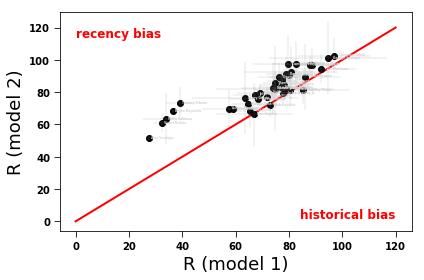

In [28]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights2,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['R'],S1['R']],[S2['R']-S2['eR'],S2['R']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['R']-S1['eR'],S1['R']+S1['eR']],[S2['R'],S2['R']],color='gray',lw=0.2)
    plt.scatter(S1['R'],S2['R'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['R'],S2['R'],pl,size=3,color='lightgray')

    
nmax = 120.


plt.text(0.,nmax,'recency bias',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'historical bias',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.xlabel('R (model 1)',size=18)
plt.ylabel('R (model 2)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

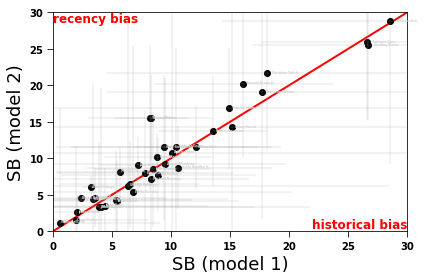

In [30]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights2,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['SB'],S1['SB']],[S2['SB']-S2['eR'],S2['SB']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['SB']-S1['eR'],S1['SB']+S1['eR']],[S2['SB'],S2['SB']],color='gray',lw=0.2)
    plt.scatter(S1['SB'],S2['SB'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['SB'],S2['SB'],pl,size=3,color='lightgray')

    
nmax = 30.


plt.text(0.,nmax,'recency bias',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'historical bias',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.axis([0.,nmax,0.,nmax])

plt.xlabel('SB (model 1)',size=18)
plt.ylabel('SB (model 2)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')